<a href="https://colab.research.google.com/github/yashjain-99/Projects/blob/main/CharRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import random
import shutil
from tensorflow.keras.optimizers import RMSprop
from shutil import copyfile
from os import getcwd

In [2]:
local_zip = '/content/drive/MyDrive/Colab Notebooks/archive (1).zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
os.mkdir('/content/charrecog')
zip_ref.extractall('/content/charrecog')
zip_ref.close()

In [3]:
base_training_dir='/content/charrecog/Training Data'
len(os.listdir(base_training_dir))

36

In [4]:
for n, val in enumerate(os.listdir(base_training_dir)):
    globals()["var%s"%val] = os.path.join(base_training_dir,val)


In [5]:
print(os.listdir(var0))

['train_30_00193.png', 'train_30_02356.png', 'train_30_00054.png', 'train_30_01100.png', 'train_30_00512.png', 'train_30_01755.png', 'train_30_02952.png', 'train_30_02163.png', 'train_30_01621.png', 'train_30_01121.png', 'train_30_01518.png', 'train_30_01442.png', 'train_30_02996.png', 'train_30_02822.png', 'train_30_02705.png', 'train_30_02231.png', 'train_30_01185.png', 'train_30_02900.png', 'train_30_02763.png', 'train_30_01974.png', 'train_30_02802.png', 'train_30_01177.png', 'train_30_01287.png', 'train_30_01163.png', 'train_30_02002.png', 'train_30_02111.png', 'train_30_02913.png', 'train_30_01148.png', 'train_30_00645.png', 'train_30_02496.png', 'train_30_01248.png', 'train_30_00565.png', 'train_30_01440.png', 'train_30_00391.png', 'train_30_00494.png', 'train_30_01866.png', 'train_30_02237.png', 'train_30_01572.png', 'train_30_02104.png', 'train_30_00841.png', 'train_30_02891.png', 'train_30_00116.png', 'train_30_00274.png', 'train_30_00534.png', 'train_30_00394.png', 'train_30

(128, 128, 3)


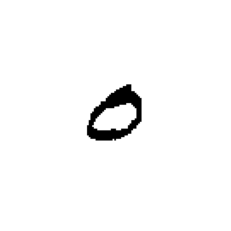

(128, 128, 3)


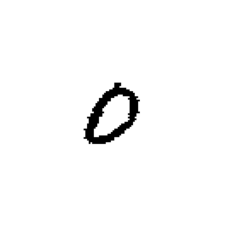

(128, 128, 3)


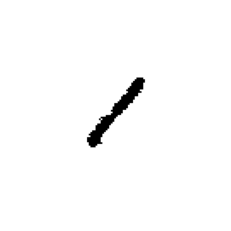

(128, 128, 3)


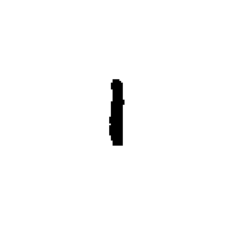

(128, 128, 3)


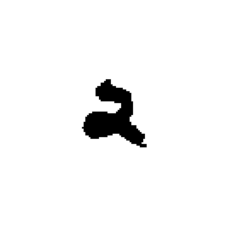

(128, 128, 3)


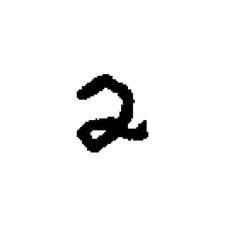

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(var0, fname) 
                for fname in os.listdir(var0)[pic_index-2:pic_index]]
next_paper = [os.path.join(var1, fname) 
                for fname in os.listdir(var1)[pic_index-2:pic_index]]
next_scissors = [os.path.join(var2, fname) 
                for fname in os.listdir(var2)[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  print(img.shape)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [26]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(128,128,3)),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(36, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                  

In [27]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = base_training_dir
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,)


train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(128,128),
	class_mode='categorical',
  batch_size=126
)

Found 30634 images belonging to 36 classes.


In [29]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nReached 97.0% accuracy so cancelling training!")
      self.model.stop_training = True

In [30]:
callbacks = myCallback()
history = model.fit(train_generator, epochs=25, verbose = 1, callbacks=[callbacks])
model.save("CharRecog.h5")

Epoch 1/25
244/244 [==============================] - 163s 650ms/step - loss: 1.6904 - accuracy: 0.4060
Epoch 2/25
244/244 [==============================] - 160s 655ms/step - loss: 0.5036 - accuracy: 0.8464
Epoch 3/25
244/244 [==============================] - 166s 678ms/step - loss: 0.2675 - accuracy: 0.9219
Epoch 4/25
244/244 [==============================] - 171s 701ms/step - loss: 0.1950 - accuracy: 0.9432
Epoch 5/25
244/244 [==============================] - 166s 678ms/step - loss: 0.1626 - accuracy: 0.9519
Epoch 6/25
244/244 [==============================] - 157s 643ms/step - loss: 0.1393 - accuracy: 0.9586
Epoch 7/25
244/244 [==============================] - 162s 662ms/step - loss: 0.1195 - accuracy: 0.9641
Epoch 8/25
244/244 [==============================] - 170s 700ms/step - loss: 0.1069 - accuracy: 0.9680
Epoch 9/25
244/244 [==============================] - ETA: 0s - loss: 0.1011 - accuracy: 0.9706
Reached 97.0% accuracy so cancelling training!
244/244 [================

In [40]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
def prediction(pth):
  img = image.load_img(pth, target_size=(128, 128))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  y_out = np.argmax(classes, axis = 1)
  print(y_out)
  return y_out

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[18]
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 5.836713e-30 0.000000e+00 0.000000e+00
  0.000000e+00]]
[18]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[18]


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[18]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[18]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9999726e-01 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.2128119e-36 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.7051235e-06 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
[18]


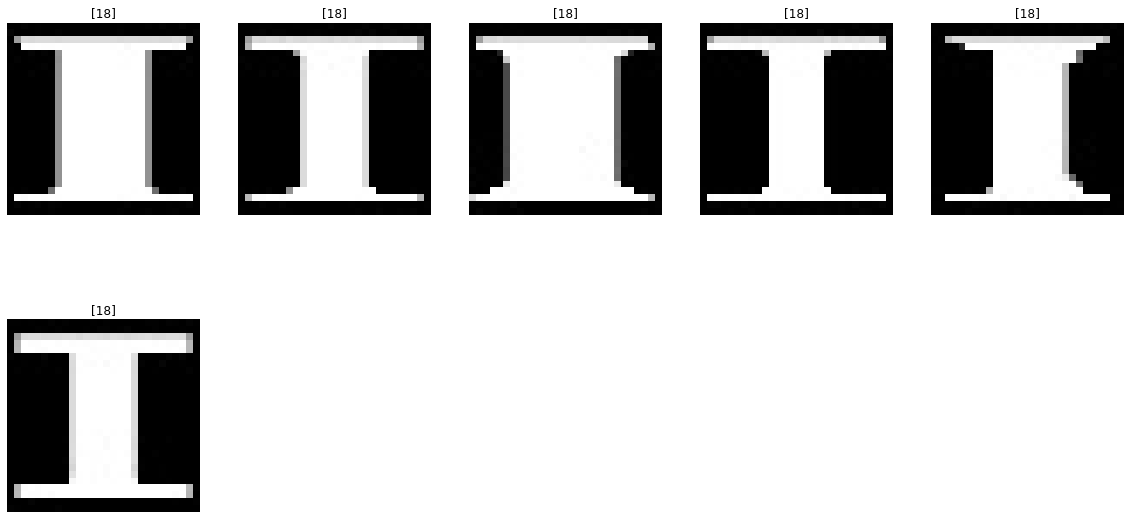

In [61]:
import cv2
rows=2
columns=5
fig = plt.figure(figsize=(20, 10))
i=0
path_0='/content/charrecog/Testing Data/class_I'
for images in random.sample(os.listdir(path_0),6):
  i+=1
  p=os.path.join(path_0,images)
  pred=prediction(p)
  temp=cv2.imread(os.path.join(path_0,images))
  fig.add_subplot(rows, columns, i)
  plt.imshow(temp)
  plt.title(pred)
  plt.axis('off')

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[24]


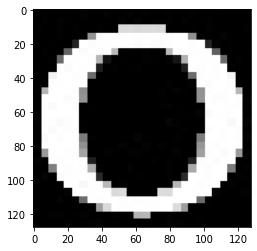

In [35]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
img = image.load_img('/content/charrecog/Testing Data/0/class_0_5.jpg', target_size=(128, 128))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)
y_out = np.argmax(classes, axis = 1)
print(y_out)